<a href="https://colab.research.google.com/github/Niladri-Pahari/Airfoil_Data/blob/main/AE_707_GW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thin Airfoil Code
## Assignment 1
## Team Members: Niladri Pahari || Ajay Kumar Meena || Amitesh Singh 

In [17]:
## Define Angle of Attack and NACA 4 series Airfoil ## 

NACA_Airfoil="3306"
Angle_of_Attack=8


In [18]:
!git clone https://github.com/Niladri-Pahari/Airfoil_Data.git

fatal: destination path 'Airfoil_Data' already exists and is not an empty directory.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import warnings
warnings.filterwarnings('ignore')

# NACA 4 series Airfoil
The class "airfoil" gives the camber and thickness distributions of a NACA 4 series airfoil.

NACA 4 series airfoils are specified by their maximum camber in percentage of chord $\textbf{m}$ , location of maximum camber in tenth of chord $\textbf{p}$ and maximum thickness in percentage of chord $\textbf{t}$.

For $\textbf{NACA 2412}$ these parameters are $\textbf{m}=0.02$, $\textbf{p}=0.4$ and $\textbf{t}=0.12$

Given these parameters any NACA 4 series airfoil can be generated using the camber and thickness distributions as 

\begin{equation} 
\frac{Z_c(x)}{C}=
  \begin{cases}
    \frac{m}{p^2}(2p\frac{x}{c}-\frac{x^2}{c^2}) & 0\leq\frac{x}{c}\leq p\\
    \frac{m}{(1-p)^2}(1-2p+2p\frac{x}{c}-\frac{x^2}{c^2}) & p\leq\frac{x}{c}\leq 1
  \end{cases}
\end{equation}

\begin{equation}
  \frac{Z_t(x)}{C}=5t\left(0.2969\sqrt{\frac{x}{c}}-0.126\frac{x}{c}-0.3516\left(\frac{x}{c}\right)^2+0.2843\left(\frac{x}{c}\right)^3-0.1036\left(\frac{x}{c}\right)^4\right)~0\leq\frac{x}{c}\leq 1
\end{equation}

In [20]:
## Part 1 ##
## NACA Camber and Thickness Function ##

class airfoil:

  def __init__(self,name="3306"):

    self.kind="NACA_"+name
    self.m=int(name[0])/100
    self.p=int(name[1])/10
    self.t=(int(name[2])*10+int(name[3]))/100

  def camber(self,x):
    if x>1 or x<0:
      raise Exception("Enter normalized coordinates")
    

    if x<self.p:
        return self.m/self.p**2*(2*self.p*x-x**2)
    else:
        return self.m/(1-self.p)**2*((1-2*self.p)+2*self.p*x-x**2)
 

  def thickness(self,x):

    if x>1 or x<0:
      raise Exception("Enter normalized coordinates")

    return 5*self.t*(0.2969*np.sqrt(x)-0.126*x-0.3516*x**2+0.2843*x**3-0.1036*x**4)
    


# Derivative class
The class $``derivative"$ gives the derivative of the Camber and Thickness function at any given point.The derivatives are obtained using forward difference at the leading edge and backward difference at the trailing edge.Central difference scheme is used at the rest of the points. Central difference schemes are second order accurate in step size $\textbf{h}$ hence to match the accuracy second order accurate forward and backward differences are used.

The finite difference approximations of the derivatives are given as:

Central Difference:
\begin{equation}
\frac{\partial f(x)}{\partial x}=\frac{f(x+h)-f(f-h)}{2h}~~......~~O(h^2)
\end{equation} 
Forward Difference:
\begin{equation}
\frac{\partial f(x)}{\partial x}=\frac{4f(x+h)-f(x+2h)-3f(x)}{2h}~~......~~O(h^2)
\end{equation}
Backward Difference:
\begin{equation}
\frac{\partial f(x)}{\partial x}=\frac{f(x-2h)-4f(x-h)+3f(x)}{2h}~~......~~O(h^2)
\end{equation}

In [21]:
## Part 2 ##
## Camber and Thickness Derivative ##

class derivative:

  def __init__(self,obj1):
    self.obj=obj1
  def camber_derivative(self,x):
    h=0.0001
    if x>1 or x<0:
      raise Exception("Enter normalized coordinates")
    if x==0:
      return (4*self.obj.camber(x+h)-self.obj.camber(x+2*h)-3*self.obj.camber(x))/2/h
    elif x==1:
      return (self.obj.camber(x-2*h)-4*self.obj.camber(x-h)+3*self.obj.camber(x))/2/h
    else: 
      return (self.obj.camber(x+h)-self.obj.camber(x-h))/2/h
  def thickness_derivative(self,x):
    h=0.0001
    if x>1 or x<0:
      raise Exception("Enter normalized coordinates")
    if x==0:
      return (4*self.obj.thickness(x+h)-self.obj.thickness(x+2*h)-3*self.obj.thickness(x))/2/h
    elif x==1:
      return (self.obj.thickness(x-2*h)-4*self.obj.thickness(x-h)+3*self.obj.thickness(x))/2/h
    else: 
      return (self.obj.thickness(x+h)-self.obj.thickness(x-h))/2/h


# Thin Airfoil Therory
The class$``thin\_airfoil"$ solves the thin airfoil problem for any given airfoil. It divides the problem in three sub problems the Angle of attack problem, the Camber problem and the thickness problem.
###1.Angle of Attack Problem
The angle of attack problem models a thin flat plate placed at an arbitrary angle of attack $\alpha$ in a free stream $V_{\infty}$.The flat plate is modelled as a flat vortex sheet having the circulation distribution as $\gamma(x)$.The vorticity distribution is found by solving the flow tangency condition on the plate surface. 

The thin airfoil equation for a flat plate is given by:
\begin{equation}
\frac{1}{2\pi}\int_{0}^{c}\frac{\gamma(\xi)}{\left(x-\xi\right)}d\xi=V_{\infty}\alpha
\end{equation}

Solving the above equation gives the circulation distribution as, $\nu(x)=2\alpha V_{\infty} \sqrt{\frac{c-x}{x}}$.

The pressure distributions on the upper and lower surfaces are then obtained as
\begin{equation}
C_p^{\overset{+}{-}}(x)=\overset{-}{+}~2\alpha\sqrt{\frac{c-x}{x}}
\end{equation}

The lift and moment coefficients are then calculated accordingly.
\begin{equation}
C_l^{'}=\int_{0}^{1}\left(C_p^+-C_p^- \right)d\left(\frac{x}{c}\right) \\
C_{m,c/4}^{'}=\int_{0}^{1}\left(C_p^+-C_p^- \right)\left(\frac{x}{c}-\frac{1}{4}\right) ~d\left(\frac{x}{c}\right)
\end{equation}

For a flat plate the values are $C_l^{'}=2\pi\alpha$ and $C_{m,c/4}^{'}=0$

###2.Camber Problem
The camber problem solves for a cambered thin plate placed at 0 angle of attack in a free stream $V_{\infty}$. The cambered plate is modelled as a flat vortex sheet placed on the chord (x axis). The thin airfoil equation for this case is:
\begin{equation}
\frac{1}{2\pi}\int_{0}^{c}\frac{\gamma(\xi)}{\left(x-\xi\right)}d\xi=-V_{\infty}\frac{dZ_c(x)}{dx}
\end{equation}
The above integral-differntial equation is solved using Ansatz with the guess circulation distribution as 
\begin{equation}
\gamma(\theta)=2V_{\infty}\left( A_0\frac{1+cos\theta}{sin\theta}+\sum_{m=1}^{\infty}A_msinm\theta\right) ~~~~ \theta=cos^{-1}(1-2\frac{x}{c})
\end{equation}
The above set of problem and assumed solution leads to
\begin{equation}
\frac{dZ_c}{dx}(\theta_0)=-A_0+\sum_{m=1}^{\infty}A_mcosm\theta_0 \\
\therefore A_0=-\frac{1}{\pi}\int_{0}^{\pi}\frac{dZ_c}{dx}(\theta_0)d\theta_0~~ and ~~A_m=\frac{2}{\pi}\int_{0}^{\pi}\frac{dZ_c}{dx}(\theta_0)cosm\theta_0d\theta_0
\end{equation}
The pressure distribution is obtained as 
\begin{equation}
C_p^{\overset{+}{-}}(\theta)=\overset{-}{+}~2\left( A_0\frac{1+cos\theta}{sin\theta}+\sum_{m=1}^{\infty}A_msinm\theta\right)
\end{equation}

Solving the lift and Moment coefficients are obtained as $C_l^{'}=2\pi\left(A_0+\frac{A_1}{2}\right)$ and $C_{m,c/4}^{'}=\frac{\pi}{4}\left(A_2-A_1\right)$ 

###3. Thickness Problem
The thickness problem solves for a thick , symmetric airfoil placed at 0 angle of attack in a free stream $V_{\infty}$
The thick airfoil is modelled as a flat source sheet having sourc density $q(x)$ placed on the chord (x axis) of the airfoil.

The thin airfoil equation for this case is:
\begin{equation}
q(x)=2V_{\infty}\frac{dZ_t(x)}{dx}
\end{equation}

The pressure distribution in this case is obtained as
\begin{equation}
C_p^{\overset{+}{-}}=-\frac{2}{\pi}\int_{0}^{c}\frac{Z_t^{'}(\xi)}{x-\xi}d\xi
\end{equation}
Because of the equal pressure distribution no net lift or moment is produced by such thick airfoil. Thus $C_l^{'}=0$ and $C_{m,c/4}^{'}=0$

Thus the for the complete problem the coefficients are
\begin{equation}
C_l^{'}=2\pi\left(\alpha+A_0+\frac{A_1}{2}\right) \\
C_{m,c/4}^{'}=\frac{\pi}{4}\left(A_2-A_1\right) 
\end{equation}

In [22]:
## Part 3 ##
## Solution ##

class thin_airfoil:

  def __init__(self,obj2):
    self.obj=obj2
    
  def solution(self,alpha=0,flag=0):
    cl=0
    cm_c4=0
    N=200
    x=np.linspace(0,1,N+1)
    theta=np.arccos(1-2*x)
    cp_up=np.zeros_like(x)
    cp_dwn=np.zeros_like(x)

    # Angle of Attack #

    cl+=2*np.pi*np.deg2rad(alpha)
    cm_c4+=0
    cp_up[:] +=-2*np.deg2rad(alpha)*np.sqrt((1-x[:])/x[:])
    cp_dwn[:] +=2*np.deg2rad(alpha)*np.sqrt((1-x[:])/x[:])

    # Camber Problem

    A=np.zeros(7)
    zc_dash=np.zeros_like(x)
    for i in range(len(x)):
      zc_dash[i]=self.obj.camber_derivative(x[i])
    A[0]=-1/np.pi*integrate.simps(zc_dash, theta, even='avg')
    for i in range(1,len(A)):
      A[i]=2/np.pi*integrate.simps([a*np.cos(i*b) for (a,b) in zip(zc_dash,theta)], theta, even='avg')
    
    cl +=2*np.pi*(A[0]+A[1]/2)
    cm_c4 +=np.pi/4*(A[2]-A[1])

    for i in range(len(x)):
      cp_up[i] +=-2*(A[0]*(1+np.cos(theta[i]))/(np.sin(theta[i]))+np.sum([A[j]*np.sin(j*theta[i]) for j in range(1,len(A))]))
      cp_dwn[i] +=2*(A[0]*(1+np.cos(theta[i]))/(np.sin(theta[i]))+np.sum([A[j]*np.sin(j*theta[i]) for j in range(1,len(A))]))
    
    # Thickness Problem

    B=np.zeros(7)
    zt=np.zeros_like(x)
    for i in range(len(x)):
      zt[i]=self.obj.obj.thickness(x[i])
    for i in range(len(B)):
      B[i]=2/np.pi*integrate.simps([k*np.sin((i+1)*j) for (k,j) in zip(zt,theta)],theta,even="avg")
    for i in range(len(x)):
      cp_up[i] += np.sum([-4*(j+1)*B[j]*np.sin((j+1)*theta[i])/np.sin(theta[i]) for j in range(len(B))])
      cp_dwn[i] += np.sum([-4*(j+1)*B[j]*np.sin((j+1)*theta[i])/np.sin(theta[i]) for j in range(len(B))])

    ## Plotting ##
    if flag==1:
      plt.figure(dpi=100,figsize=(12,8),facecolor='lightgray')

      plt.plot(x,cp_up,color="g",LineWidth=3)
      plt.plot(x,cp_dwn,color="r",LineWidth=3)
      plt.xlabel("$X/C$",fontsize=20)
      plt.ylabel("$C_p$",fontsize=20)
      plt.title(self.obj.obj.kind,fontsize=25)
      plt.axis([0,1,2,-4])
      plt.grid()

      # Validation Plot #
      Cp_xfoil=[]
      Cp_AS=[]
      X_xfoil=[]
      X_AS=[]

      # Xfoil #
      try:
        string1=self.obj.obj.kind+"_"+str(alpha)+".txt"
        with open("https://raw.githubusercontent.com/Niladri-Pahari/Airfoil_Data/main/NACA_3306_8.txt") as f:
            for line in f:
              if len(line)==29:
                a1=line.strip().split()
                Cp_xfoil.append(float(a1[2]))
                X_xfoil.append(float(a1[0]))
        plt.plot(X_xfoil,Cp_xfoil,color='k',LineWidth=3)
      except:
        pass
    
      
      ax=plt.axes()
      ax.xaxis.set_tick_params(labelsize=15)
      ax.yaxis.set_tick_params(labelsize=15)
      plt.legend(["$C_p^{+}$","$C_p^{-}$","Xfoil"],loc=0,fontsize=15)
      plt.show()

    # Vector Plot #
    if flag==2:
      b=5
      plt.figure(dpi=100,figsize=(12,8),facecolor='lightgray')
      Zt=np.zeros_like(x)
      Zc=np.zeros_like(x)
      Zt_dash=np.zeros_like(x)
      Zc_dash=np.zeros_like(x)
      for i in range(len(x)):
        Zt[i]=self.obj.obj.thickness(x[i])
        Zc[i]=self.obj.obj.camber(x[i])
        Zt_dash[i]=self.obj.thickness_derivative(x[i])
        Zc_dash[i]=self.obj.camber_derivative(x[i])
      
      for i in range(len(x)):
        x1=x[i]
        if x1<0.01:
          continue
        y1=Zt[i]+Zc[i]
        l=cp_up[i]
        if l>0:
          colour='g'
        else:
          colour='r'
        l=np.abs(l)/b
        s=Zc_dash[i]+Zt_dash[i]
        x2=x1-l*np.sin(np.arctan(s))
        y2=y1+l*np.cos(np.arctan(s))
        plt.plot([x1,x2],[y1,y2],color=colour)
        x1=x[i]
        if x1<0.01:
          continue
        y1=-Zt[i]+Zc[i]
        l=cp_dwn[i]
        if l>0:
          colour='g'
        else:
          colour='r'
        l=np.abs(l)/b
        s=Zc_dash[i]-Zt_dash[i]
        x2=x1+l*np.sin(np.arctan(s))
        y2=y1-l*np.cos(np.arctan(s))
        plt.plot([x1,x2],[y1,y2],color=colour)

      plt.plot(x,Zc-Zt,color='k')
      plt.plot(x,Zt+Zc,color='k')

      plt.axis("equal")
      plt.title("Vector Plot",fontsize=25)
      plt.show()  


    

    return cl,cm_c4

In [23]:
def plot_airfoil(obj):
  a_range=np.linspace(-10,10,21)
  cl_mat=np.zeros(len(a_range))
  cm_mat=np.zeros(len(a_range))


  for i in range(len(a_range)):

    cl_mat[i],cm_mat[i]=obj.solution(a_range[i],0)

  cl_alpha=(cl_mat[1]-cl_mat[0])/(a_range[1]-a_range[0])
  alpha_l_0=a_range[2]-cl_mat[2]/cl_alpha

  fig=plt.figure(figsize=(20,8),facecolor='lightgray')
  ax1=plt.subplot(1,2,1)
  ax2=plt.subplot(1,2,2)

  alpha_mat=[]
  Cl_mat=[]
  Cm_c_4=[]
  Cm_a_c=[]

  try:
    with open("NACA_3306_CL.txt") as f:
      for line in f:
          a1=line.strip().split()
          alpha_mat.append(float(a1[0]))
          Cl_mat.append(float(a1[1]))
          Cm_c_4.append(float(a1[2]))
          Cm_a_c.append(float(a1[4]))

    ax1.plot(alpha_mat,Cl_mat,color='k',LineWidth=3)
    ax2.plot(alpha_mat,Cm_c_4,color='k',LineWidth=3)
    ax2.plot(alpha_mat,Cm_a_c,color='g',LineWidth=3)
  except:
    pass

  ax1.plot(a_range,cl_mat,color='b',marker="o",markerfacecolor='r',LineWidth=3)
  plt.grid()
  ax1.annotate(["$C_{L,a}$="+str(np.round(cl_alpha*180/np.pi,4))+"/rad"],[0,0],fontsize=12)
  ax1.annotate(["$a_{L=0}$="+str(np.round(alpha_l_0,4))+" deg"],[0,-0.1],fontsize=12)


  ax1.set_xlabel("Angle of Attack (deg)",fontsize=20)
  ax1.set_ylabel("$C_L^{'}$",fontsize=25)
  ax1.legend(["Xfoil","Code"],fontsize=15)
  
  
  ax2.plot(a_range,cm_mat,color='b',marker="o",markerfacecolor='r',LineWidth=3)
  plt.grid()
  ax2.annotate(["$C_{m,c/4}$="+str(np.round(cm_mat[0],4))],[0,cm_mat[0]*1.01],fontsize=12)


  ax2.set_xlabel("Angle of Attack (deg)",fontsize=20)
  ax2.set_ylabel("$C_{m,c/4}^{'}$",fontsize=25)
  ax2.legend(["Xfoil$C_{m,c/4}$","Xfoil$C_{m,ac}$","Code"],fontsize=15)

  ax1.grid()
  ax2.grid()
  plt.suptitle(obj.obj.obj.kind,fontsize=25)
  fig.tight_layout()
  plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.2)
 
  plt.show()

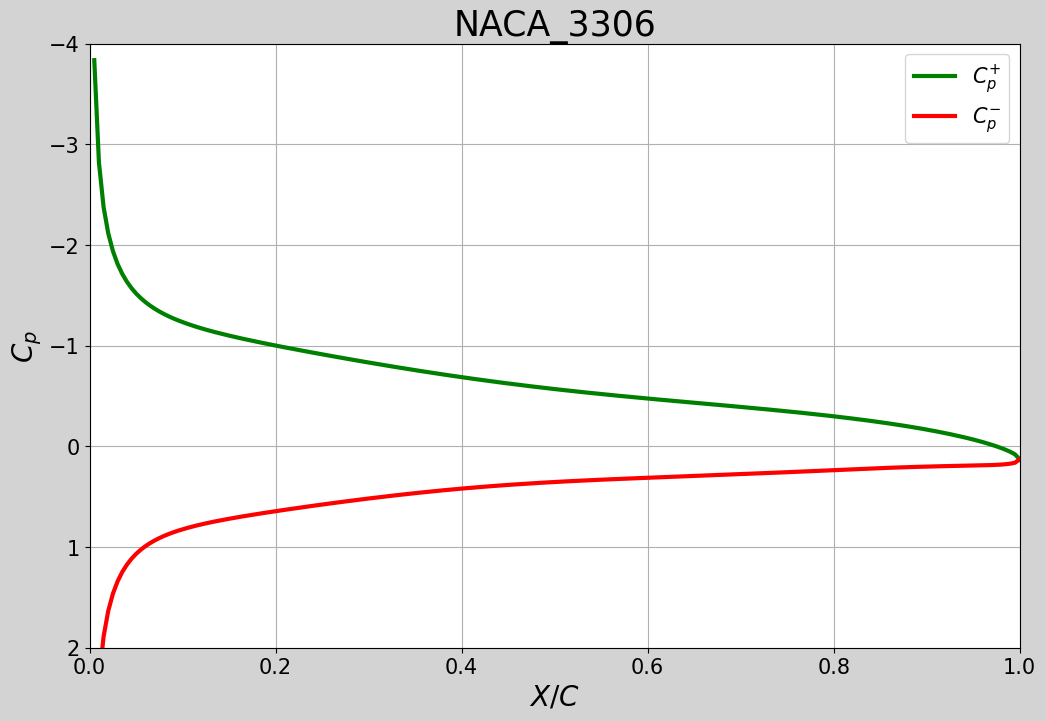

Cl from code is : 1.192779141702915  Cm_c/4 from code is : -0.06709666267839004


In [24]:
a1=airfoil(NACA_Airfoil)

a1_diff=derivative(a1)

a2=thin_airfoil(a1_diff)

cl,cm=a2.solution(Angle_of_Attack,1)

print("Cl from code is : "+str(cl)+"  Cm_c/4 from code is : "+str(cm))

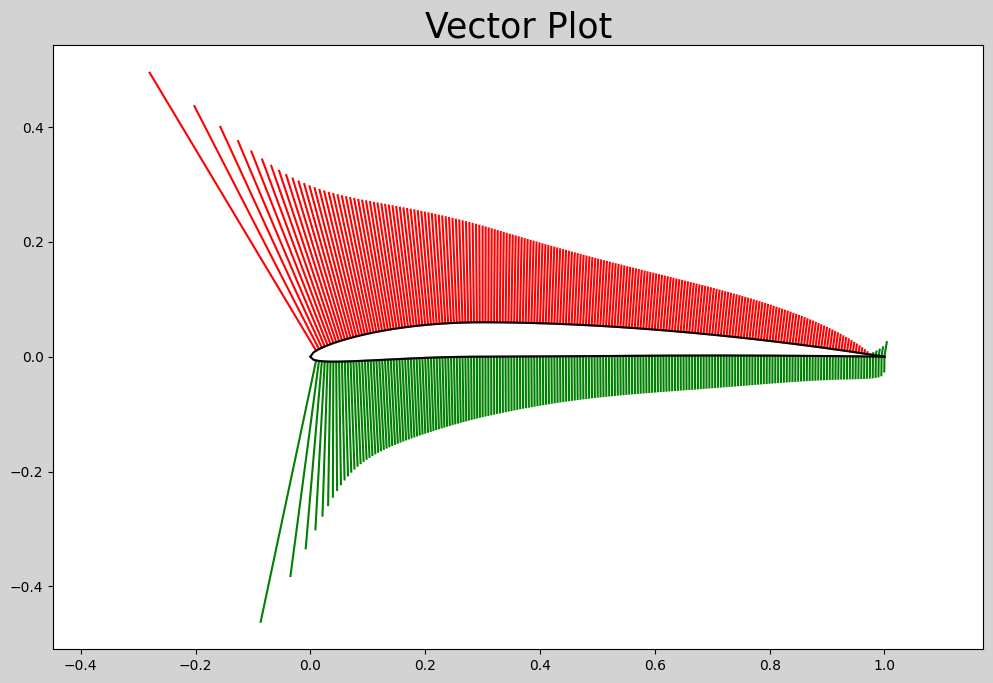

In [25]:
_,_=a2.solution(Angle_of_Attack,2)

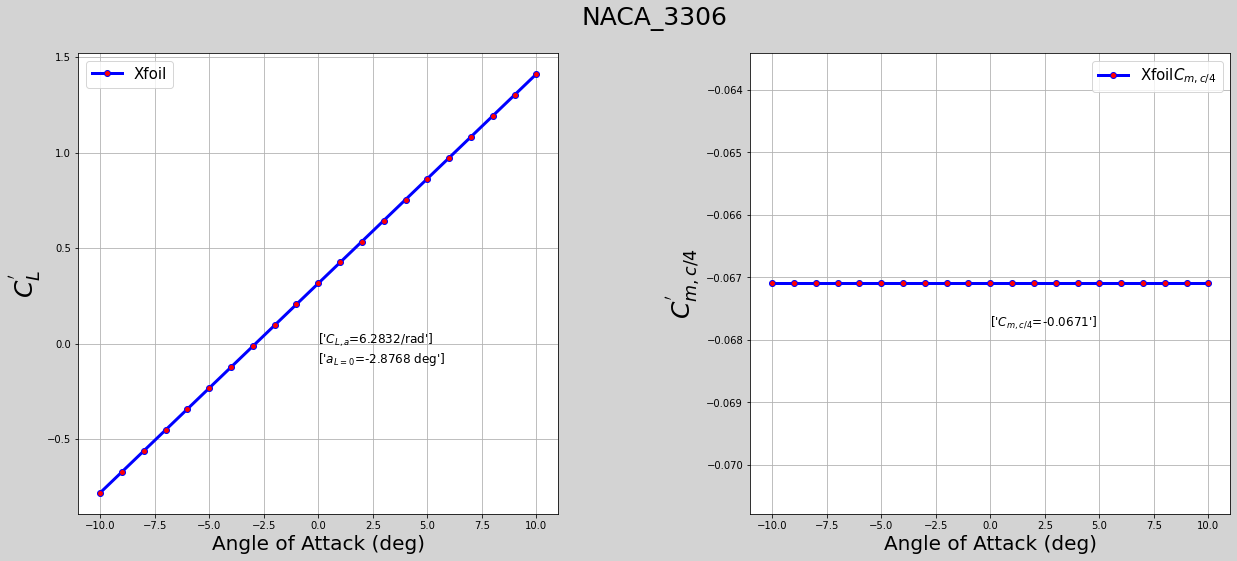

In [26]:
plot_airfoil(a2)

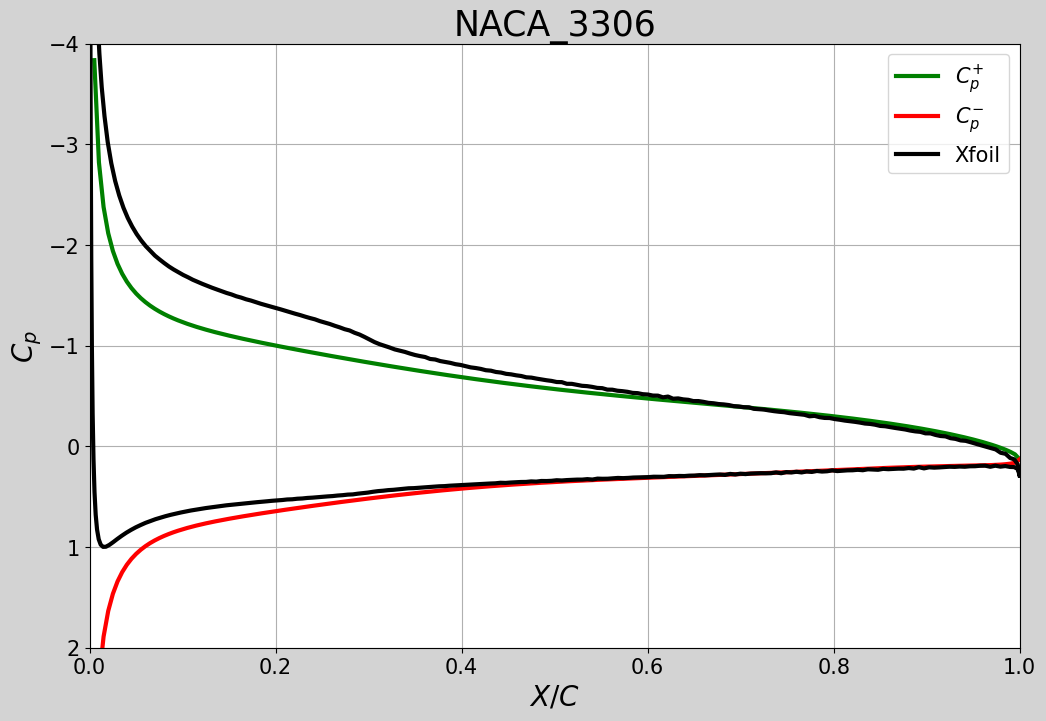

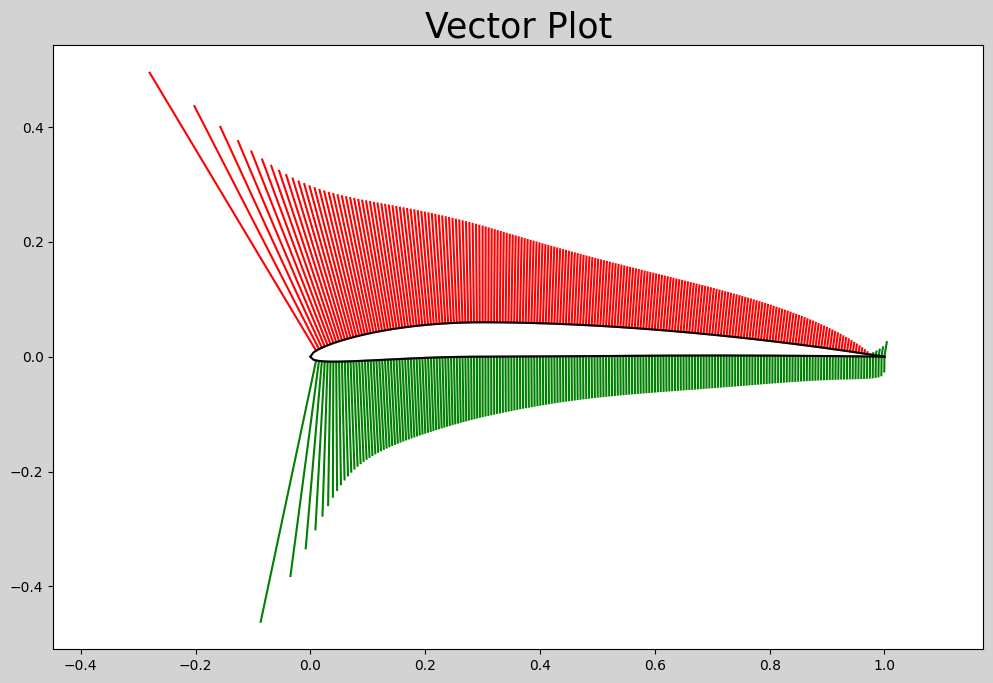

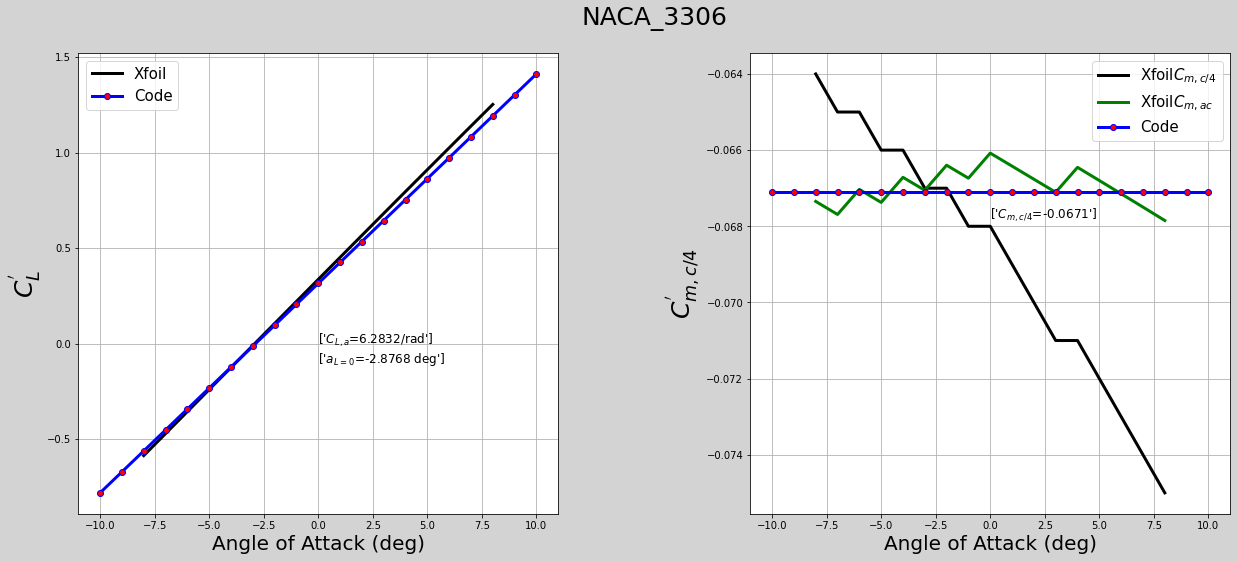